In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [27]:
#01). 텐서버전 확인
print(tf.__version__)

2.4.1


In [28]:
#02). imbd의 데이터를 10000개만 로드 하자.
imdb = keras.datasets.imdb
(train_data, train_labels),(test_data, test_labels) = imdb.load_data(num_words = 10000)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant

In [29]:
#03). 훈련데이터와 훈련 데이터 레이블을 출력 해보자.
print("훈련샘플 :{} 훈련 레이블 :{}".format(len(train_data), len(train_labels)))
print(train_data[0])
print(len(train_data[0]))
print(len(train_data[1]))

훈련샘플 :25000 훈련 레이블 :25000
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
218
189


In [30]:
###### 05). 내용을 확인
word_index = imdb.get_word_index()
word_index = {k : (v+3) for k,v in word_index.items()}

word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i,'?') for i in text])



In [31]:
#07) len(train_data[0]), len(train_data[1]) -> 218, 189의 내용의 길이가 다르다.
# 길이를 256으로 맞추고 나머지를 0으로 채워라.
train_data = keras.preprocessing.sequence.pad_sequences(train_data, maxlen=256, padding='post', 
                                                        value=word_index["<PAD>"])
test_data = keras.preprocessing.sequence.pad_sequences(train_data, maxlen=256, padding='post', 
                                                        value=word_index["<PAD>"])
print(len(train_data[0]))
print(len(train_data[1]))
print(train_data[0])
print(decode_review(train_data[0]))
print(decode_review(train_data[1]))

256
256
[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  10

In [32]:
#08 모델을 생성하자.
vocab_size = 10000
model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16, input_shape = (None,)))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation = 'relu'))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))
model.summary()

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_3 ( (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [36]:
#09) 훈련 시키자
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

history = model.fit(
        partial_x_train,
        partial_y_train,
        epochs = 40,
        batch_size = 512,
        validation_data = (x_val, y_val),
        verbose = 1
)

results = model.evaluate(test_data, test_labels, verbose=2)
print(results)

Epoch 1/40
30/30 [==============================] - 1s 19ms/step - loss: 0.0878 - accuracy: 0.9781 - val_loss: 0.3160 - val_accuracy: 0.8814
Epoch 2/40
30/30 [==============================] - 1s 20ms/step - loss: 0.0844 - accuracy: 0.9796 - val_loss: 0.3192 - val_accuracy: 0.8822
Epoch 3/40
30/30 [==============================] - 1s 17ms/step - loss: 0.0807 - accuracy: 0.9811 - val_loss: 0.3231 - val_accuracy: 0.8804
Epoch 4/40
30/30 [==============================] - 1s 18ms/step - loss: 0.0776 - accuracy: 0.9817 - val_loss: 0.3271 - val_accuracy: 0.8797
Epoch 5/40
30/30 [==============================] - 1s 17ms/step - loss: 0.0747 - accuracy: 0.9832 - val_loss: 0.3309 - val_accuracy: 0.8805
Epoch 6/40
30/30 [==============================] - 1s 18ms/step - loss: 0.0718 - accuracy: 0.9841 - val_loss: 0.3360 - val_accuracy: 0.8786
Epoch 7/40
30/30 [==============================] - 1s 18ms/step - loss: 0.0693 - accuracy: 0.9849 - val_loss: 0.3393 - val_accuracy: 0.8784
Epoch 8/40
30

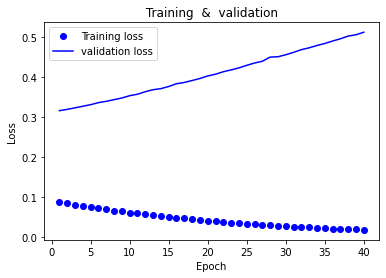

In [37]:
#10) 시각화
import matplotlib.pyplot as plt

history_dict = history.history
history_dict.keys()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

#파란색 점 bo
plt.plot(epochs,loss,'bo',label = 'Training loss')

#파란색 실선 b
plt.plot(epochs,val_loss,'b',label = 'validation loss')
plt.title(" Training  &  validation ")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

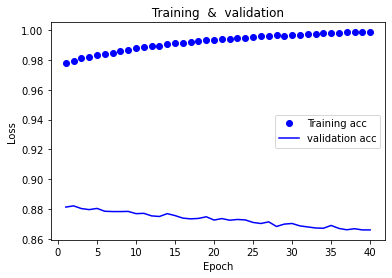

In [38]:
#파란색 점 bo
plt.plot(epochs,acc,'bo',label = 'Training acc')

#파란색 실선 b
plt.plot(epochs,val_acc,'b',label = 'validation acc')
plt.title(" Training  &  validation ")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()